In [582]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import statistics
from scipy.stats import norm
from numpy.polynomial.polynomial import polyfit
import warnings

In [583]:
warnings.filterwarnings('ignore')

In [584]:
#We are loading the four data files - query file and the results files
query = pd.read_csv('queries-history.tsv', sep='\t', header=None, names=["query_type", "sql_query"])
old_schema = pd.read_csv('results-v3-history.txt', sep=" ")
c_schema = pd.read_csv('results-v4.C-history.txt', sep=" ")
m_schema = pd.read_csv('results-v4.M-history.txt', sep=" ")

In [585]:
#Comparing the shapes of the different files
print(query.shape[0], old_schema.shape[0], c_schema.shape[0], m_schema.shape[0])

19365 19359 19359 19359


It is important to check that the shapes of the files are the same so that we can match the right rows and perform the analyses. In this case, we can see that the number of results do not match the number of queries, so we need to merge the data correctly 

In [586]:
#We are adding the "no" column in this table as well
query.insert(2, 'no', range(1, 1 + len(query)))

In [587]:
#A view of the query dataframe
query

,query_type,sql_query,no
0,asof-0x1__geo-0x1__signal-0x1__time-0x120,"SELECT t.geo_value, t.signal, t.time_value, t....",1
1,asof-0x1__geo-0x1__signal-0x1__time-0x1,"SELECT t.geo_value, t.signal, t.time_value, t....",2
2,asof-0x1__geo-0x1__signal-0x1__time-0x1,"SELECT t.geo_value, t.signal, t.time_value, t....",3
3,asof-0x1__geo-0x1__signal-0x1__time-0x1,"SELECT t.geo_value, t.signal, t.time_value, t....",4
4,asof-0x1__geo-0x1__signal-0x1__time-0x1,"SELECT t.geo_value, t.signal, t.time_value, t....",5
...,...,...,...
19360,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1,"SELECT t.geo_value, t.signal, t.time_value, t....",19361
19361,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1,"SELECT t.geo_value, t.signal, t.time_value, t....",19362
19362,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1,"SELECT t.geo_value, t.signal, t.time_value, t....",19363
19363,geo-0xSTAR__lag-0x1__signal-0x1__time-0x1,"SELECT t.geo_value, t.signal, t.time_value, t....",19364


In [588]:
#A view of the old schema results dataframe
old_schema

,no,real,user,sys,rows
0,1,0.424,0.003,0.003,120
1,2,0.035,0.006,0.000,0
2,3,0.015,0.005,0.000,0
3,4,0.013,0.005,0.000,0
4,5,0.015,0.005,0.000,0
...,...,...,...,...,...
19354,19361,0.118,0.009,0.000,3651
19355,19362,0.119,0.009,0.000,3651
19356,19363,0.113,0.010,0.000,3651
19357,19364,0.082,0.000,0.005,0


In [589]:
#A view of the C schema results dataframe
c_schema

,no,real,user,sys,rows
0,1,1.316,0.000,0.011,120
1,2,0.058,0.004,0.002,0
2,3,0.043,0.001,0.005,0
3,4,0.039,0.000,0.006,0
4,5,0.031,0.000,0.006,0
...,...,...,...,...,...
19354,19361,2.506,0.007,0.003,3651
19355,19362,1.472,0.000,0.010,3651
19356,19363,2.505,0.011,0.000,3651
19357,19364,0.186,0.006,0.001,0


In [590]:
#A view of the M schema results dataframe
m_schema

,no,real,user,sys,rows
0,1,1.838,0.007,0.000,120
1,2,0.012,0.006,0.000,0
2,3,0.011,0.005,0.000,0
3,4,0.011,0.005,0.000,0
4,5,0.011,0.005,0.000,0
...,...,...,...,...,...
19354,19361,2.127,0.007,0.003,3651
19355,19362,1.714,0.010,0.000,3651
19356,19363,3.304,0.011,0.000,3651
19357,19364,0.291,0.006,0.000,0


Now we merge the data and we do not do inner join to avoid loss of data.

In [591]:
#We merge the data here
old_schema = pd.merge(old_schema, query[["query_type","no"]], on ='no', how ='left')
c_schema = pd.merge(c_schema, query[["query_type","no"]], on ='no', how ='left')
m_schema = pd.merge(m_schema, query[["query_type","no"]], on ='no', how ='left')

In [592]:
#A new view of the old schema results dataframe
old_schema

,no,real,user,sys,rows,query_type
0,1,0.424,0.003,0.003,120,asof-0x1__geo-0x1__signal-0x1__time-0x120
1,2,0.035,0.006,0.000,0,asof-0x1__geo-0x1__signal-0x1__time-0x1
2,3,0.015,0.005,0.000,0,asof-0x1__geo-0x1__signal-0x1__time-0x1
3,4,0.013,0.005,0.000,0,asof-0x1__geo-0x1__signal-0x1__time-0x1
4,5,0.015,0.005,0.000,0,asof-0x1__geo-0x1__signal-0x1__time-0x1
...,...,...,...,...,...,...
19354,19361,0.118,0.009,0.000,3651,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1
19355,19362,0.119,0.009,0.000,3651,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1
19356,19363,0.113,0.010,0.000,3651,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1
19357,19364,0.082,0.000,0.005,0,geo-0xSTAR__lag-0x1__signal-0x1__time-0x1


Now we want to extract the geographical, signal, time, and publication values from the query_type so we parse it. We do it for all the results history.

In [593]:
#We extract the information from the four given axes using the apply function for the old schema
old_schema["geo"] = old_schema.apply(lambda x: str([sub for sub in x.query_type.split(sep="__") if "geo" in sub][0]).split(sep="-")[1][2::], axis=1)
old_schema["signal"] = old_schema.apply(lambda x: str([sub for sub in x.query_type.split(sep="__") if "signal" in sub][0]).split(sep="-")[1][2::], axis=1)
old_schema["time"] = old_schema.apply(lambda x: str([sub for sub in x.query_type.split(sep="__") if "time" in sub][0]).split(sep="-")[1][2::], axis=1)
old_schema["publication"] = old_schema.apply(lambda x: str([sub for sub in x.query_type.split(sep="__") if ("asof" in sub) or ("issue" in sub) or ("lag" in sub) or ("latest" in sub)][0]).split(sep="-")[1][2::], axis=1)

In [594]:
#A newer view of the old schema results dataframe with the axes information
old_schema

,no,real,user,sys,rows,query_type,geo,signal,time,publication
0,1,0.424,0.003,0.003,120,asof-0x1__geo-0x1__signal-0x1__time-0x120,1,1,120,1
1,2,0.035,0.006,0.000,0,asof-0x1__geo-0x1__signal-0x1__time-0x1,1,1,1,1
2,3,0.015,0.005,0.000,0,asof-0x1__geo-0x1__signal-0x1__time-0x1,1,1,1,1
3,4,0.013,0.005,0.000,0,asof-0x1__geo-0x1__signal-0x1__time-0x1,1,1,1,1
4,5,0.015,0.005,0.000,0,asof-0x1__geo-0x1__signal-0x1__time-0x1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
19354,19361,0.118,0.009,0.000,3651,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1,STAR,1,1,RANGE
19355,19362,0.119,0.009,0.000,3651,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1,STAR,1,1,RANGE
19356,19363,0.113,0.010,0.000,3651,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1,STAR,1,1,RANGE
19357,19364,0.082,0.000,0.005,0,geo-0xSTAR__lag-0x1__signal-0x1__time-0x1,STAR,1,1,1


In [595]:
#We extract the information from the four given axes using the apply function for the C schema
c_schema["geo"] = c_schema.apply(lambda x: str([sub for sub in x.query_type.split(sep="__") if "geo" in sub][0]).split(sep="-")[1][2::], axis=1)
c_schema["signal"] = c_schema.apply(lambda x: str([sub for sub in x.query_type.split(sep="__") if "signal" in sub][0]).split(sep="-")[1][2::], axis=1)
c_schema["time"] = c_schema.apply(lambda x: str([sub for sub in x.query_type.split(sep="__") if "time" in sub][0]).split(sep="-")[1][2::], axis=1)
c_schema["publication"] = c_schema.apply(lambda x: str([sub for sub in x.query_type.split(sep="__") if ("asof" in sub) or ("issue" in sub) or ("lag" in sub) or ("latest" in sub)][0]).split(sep="-")[1][2::], axis=1)

In [596]:
#We extract the information from the four given axes using the apply function for the M schema
m_schema["geo"] = m_schema.apply(lambda x: str([sub for sub in x.query_type.split(sep="__") if "geo" in sub][0]).split(sep="-")[1][2::], axis=1)
m_schema["signal"] = m_schema.apply(lambda x: str([sub for sub in x.query_type.split(sep="__") if "signal" in sub][0]).split(sep="-")[1][2::], axis=1)
m_schema["time"] = m_schema.apply(lambda x: str([sub for sub in x.query_type.split(sep="__") if "time" in sub][0]).split(sep="-")[1][2::], axis=1)
m_schema["publication"] = m_schema.apply(lambda x: str([sub for sub in x.query_type.split(sep="__") if ("asof" in sub) or ("issue" in sub) or ("lag" in sub) or ("latest" in sub)][0]).split(sep="-")[1][2::], axis=1)

In [597]:
#A newer view of the C schema results dataframe with the axes information
c_schema

,no,real,user,sys,rows,query_type,geo,signal,time,publication
0,1,1.316,0.000,0.011,120,asof-0x1__geo-0x1__signal-0x1__time-0x120,1,1,120,1
1,2,0.058,0.004,0.002,0,asof-0x1__geo-0x1__signal-0x1__time-0x1,1,1,1,1
2,3,0.043,0.001,0.005,0,asof-0x1__geo-0x1__signal-0x1__time-0x1,1,1,1,1
3,4,0.039,0.000,0.006,0,asof-0x1__geo-0x1__signal-0x1__time-0x1,1,1,1,1
4,5,0.031,0.000,0.006,0,asof-0x1__geo-0x1__signal-0x1__time-0x1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
19354,19361,2.506,0.007,0.003,3651,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1,STAR,1,1,RANGE
19355,19362,1.472,0.000,0.010,3651,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1,STAR,1,1,RANGE
19356,19363,2.505,0.011,0.000,3651,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1,STAR,1,1,RANGE
19357,19364,0.186,0.006,0.001,0,geo-0xSTAR__lag-0x1__signal-0x1__time-0x1,STAR,1,1,1


In [598]:
#A newer view of the M schema results dataframe with the axes information
m_schema

,no,real,user,sys,rows,query_type,geo,signal,time,publication
0,1,1.838,0.007,0.000,120,asof-0x1__geo-0x1__signal-0x1__time-0x120,1,1,120,1
1,2,0.012,0.006,0.000,0,asof-0x1__geo-0x1__signal-0x1__time-0x1,1,1,1,1
2,3,0.011,0.005,0.000,0,asof-0x1__geo-0x1__signal-0x1__time-0x1,1,1,1,1
3,4,0.011,0.005,0.000,0,asof-0x1__geo-0x1__signal-0x1__time-0x1,1,1,1,1
4,5,0.011,0.005,0.000,0,asof-0x1__geo-0x1__signal-0x1__time-0x1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
19354,19361,2.127,0.007,0.003,3651,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1,STAR,1,1,RANGE
19355,19362,1.714,0.010,0.000,3651,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1,STAR,1,1,RANGE
19356,19363,3.304,0.011,0.000,3651,geo-0xSTAR__issue-0xRANGE__signal-0x1__time-0x1,STAR,1,1,RANGE
19357,19364,0.291,0.006,0.000,0,geo-0xSTAR__lag-0x1__signal-0x1__time-0x1,STAR,1,1,1


Before we perform any deep analyses, it would be important to go through the distribution of the real running time for all the three schemas to see if there are any major or significant differences.

Text(0, 0.5, 'Frequency')

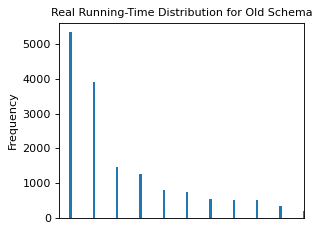

In [599]:
figure(figsize=(4, 3), dpi=80)
old_freq = old_schema["real"].value_counts().plot(kind="bar", width=0.1)
old_freq.set_xlim(-0.5, 10)
old_freq.axes.get_xaxis().set_visible(False)
plt.title("Real Running-Time Distribution for Old Schema", fontsize=10)
plt.xlabel("Running-Time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

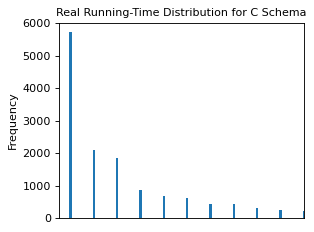

In [600]:
figure(figsize=(4, 3), dpi=80)
c_freq = c_schema["real"].value_counts().plot(kind="bar", width=0.1)
c_freq.set_xlim(-0.5, 10)
c_freq.axes.get_xaxis().set_visible(False)
plt.title("Real Running-Time Distribution for C Schema", fontsize=10)
plt.xlabel("Running-Time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

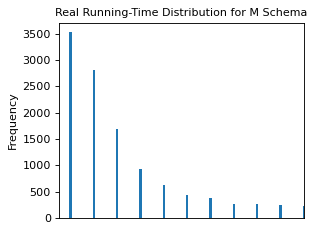

In [601]:
figure(figsize=(4, 3), dpi=80)
m_freq = m_schema["real"].value_counts().plot(kind="bar", width=0.1)
m_freq.set_xlim(-0.5, 10)
m_freq.axes.get_xaxis().set_visible(False)
plt.title("Real Running-Time Distribution for M Schema", fontsize=10)
plt.xlabel("Running-Time")
plt.ylabel("Frequency")

The three plots show that the distribution for the real run-time is quite similar, therefore learning from the summary statistics would be helpful for each of the three schemas.

In [602]:
#summary for real time - mean, max, min
old_stats_real = [round(old_schema.loc[:, 'real'].mean(), 3), old_schema.loc[:, 'real'].max(), old_schema.loc[:, 'real'].min()]
c_stats_real = [round(c_schema.loc[:, 'real'].mean(), 3), c_schema.loc[:, 'real'].max(), c_schema.loc[:, 'real'].min()]
m_stats_real = [round(m_schema.loc[:, 'real'].mean(), 3), m_schema.loc[:, 'real'].max(), m_schema.loc[:, 'real'].min()]
print(old_stats_real, c_stats_real, m_stats_real)

[0.028, 17.121, 0.005] [0.061, 15.997, 0.005] [0.062, 12.788, 0.005]


In [603]:
#summary for user time - mean, max, min
old_stats_user = [round(old_schema.loc[:, 'user'].mean(), 3), old_schema.loc[:, 'user'].max(), old_schema.loc[:, 'user'].min()]
c_stats_user = [round(c_schema.loc[:, 'user'].mean(), 3), c_schema.loc[:, 'user'].max(), c_schema.loc[:, 'user'].min()]
m_stats_user = [round(m_schema.loc[:, 'user'].mean(), 3), m_schema.loc[:, 'user'].max(), m_schema.loc[:, 'user'].min()]
print(old_stats_user, c_stats_user, m_stats_user)

[0.004, 0.024, 0.0] [0.004, 0.025, 0.0] [0.004, 0.026, 0.0]


In [604]:
#summary for kernel time - mean, max, min
old_stats_kernel = [round(old_schema.loc[:, 'sys'].mean(), 3), old_schema.loc[:, 'sys'].max(), old_schema.loc[:, 'sys'].min()]
c_stats_kernel = [round(c_schema.loc[:, 'sys'].mean(), 3), c_schema.loc[:, 'sys'].max(), c_schema.loc[:, 'sys'].min()]
m_stats_kernel = [round(m_schema.loc[:, 'sys'].mean(), 3), m_schema.loc[:, 'sys'].max(), m_schema.loc[:, 'sys'].min()]
print(old_stats_kernel, c_stats_kernel, m_stats_kernel)

[0.002, 0.01, 0.0] [0.002, 0.011, 0.0] [0.002, 0.011, 0.0]


In [605]:
print("The average real running time for old schema is " + str(old_stats_real[0]) + " unix utility, but the worst case and the best-case run-time for old schema are " + str(old_stats_real[1]) + " unix utility and " + str(old_stats_real[2]) + " unix utility, respectively.")
print("On the other hand, the average real running time for C schema is " + str(c_stats_real[0]) + " unix utility, but the worst case and the best-case run-time for C schema are " + str(c_stats_real[1]) + " unix utility and " + str(c_stats_real[2]) + " unix utility, respectively.")
print("Finally, the average real running time for M schema is " + str(m_stats_real[0]) + " unix utility, but the worst case and the best-case run-time for M schema are " + str(m_stats_real[1]) + " unix utility and " + str(m_stats_real[2]) + " unix utility, respectively.")

The average real running time for old schema is 0.028 unix utility, but the worst case and the best-case run-time for old schema are 17.121 unix utility and 0.005 unix utility, respectively.
On the other hand, the average real running time for C schema is 0.061 unix utility, but the worst case and the best-case run-time for C schema are 15.997 unix utility and 0.005 unix utility, respectively.
Finally, the average real running time for M schema is 0.062 unix utility, but the worst case and the best-case run-time for M schema are 12.788 unix utility and 0.005 unix utility, respectively.


In [606]:
print("Similarly, we also learn that the average user running time for old schema is " + str(old_stats_user[0]) + " unix utility, but the worst case and the best-case run-time for old schema are " + str(old_stats_user[1]) + " unix utility and " + str(old_stats_user[2]) + " unix utility, respectively.")
print("On the other hand, the average user running time for C schema is " + str(c_stats_user[0]) + " unix utility, but the worst case and the best-case run-time for C schema are " + str(c_stats_user[1]) + " unix utility and " + str(c_stats_user[2]) + " unix utility, respectively.")
print("Finally, the average user running time for M schema is " + str(m_stats_user[0]) + " unix utility, but the worst case and the best-case run-time for M schema are " + str(m_stats_user[1]) + " unix utility and " + str(m_stats_user[2]) + " unix utility, respectively.")

Similarly, we also learn that the average user running time for old schema is 0.004 unix utility, but the worst case and the best-case run-time for old schema are 0.024 unix utility and 0.0 unix utility, respectively.
On the other hand, the average user running time for C schema is 0.004 unix utility, but the worst case and the best-case run-time for C schema are 0.025 unix utility and 0.0 unix utility, respectively.
Finally, the average user running time for M schema is 0.004 unix utility, but the worst case and the best-case run-time for M schema are 0.026 unix utility and 0.0 unix utility, respectively.


In [607]:
#summary for rows - mean, max, min
old_stats_rows = [round(old_schema.loc[:, 'rows'].mean(), 3), old_schema.loc[:, 'rows'].max(), old_schema.loc[:, 'rows'].min()]
c_stats_rows = [round(c_schema.loc[:, 'rows'].mean(), 3), c_schema.loc[:, 'rows'].max(), c_schema.loc[:, 'rows'].min()]
m_stats_rows = [round(m_schema.loc[:, 'rows'].mean(), 3), m_schema.loc[:, 'rows'].max(), m_schema.loc[:, 'rows'].min()]
print(old_stats_rows, c_stats_rows, m_stats_rows)

[230.558, 19494, 0] [230.558, 19494, 0] [230.558, 19494, 0]


We expected the exact same results for rows for each of the three schemas as the same queries were ran for each of the schemas.

We can see that there are some differences in the summary statistics across the three schemas, so we could compare the summary statistics of the three schemas. Before performing some analyses on the above discussed factors, it would be beneficial to check if we have any high correlations as all the data is explaining different types of running time.

In [608]:
#Correlation matrix for each of the schemas
print(old_schema.corr(method ='pearson'))
print(c_schema.corr(method ='pearson'))
print(m_schema.corr(method ='pearson'))

            no      real      user       sys      rows
no    1.000000 -0.132603 -0.007649 -0.022921  0.021041
real -0.132603  1.000000  0.088799  0.048647  0.264213
user -0.007649  0.088799  1.000000 -0.904320  0.298332
sys  -0.022921  0.048647 -0.904320  1.000000  0.100361
rows  0.021041  0.264213  0.298332  0.100361  1.000000
            no      real      user       sys      rows
no    1.000000 -0.042940  0.042036  0.025847  0.021041
real -0.042940  1.000000  0.144819  0.050422  0.497621
user  0.042036  0.144819  1.000000 -0.907963  0.287890
sys   0.025847  0.050422 -0.907963  1.000000  0.091235
rows  0.021041  0.497621  0.287890  0.091235  1.000000
            no      real      user       sys      rows
no    1.000000 -0.021801  0.015196 -0.001355  0.021041
real -0.021801  1.000000  0.155640  0.056101  0.484955
user  0.015196  0.155640  1.000000 -0.895987  0.317729
sys  -0.001355  0.056101 -0.895987  1.000000  0.085096
rows  0.021041  0.484955  0.317729  0.085096  1.000000


Interestingly, we can see that there is a very strong negative correlation between sys and user running time, so we can narrow down our comparisons to real and user running time.

In [609]:
#summary data for real running-time
summary_real = pd.DataFrame(
   {
      "average_": [],
      "max_": [],
      "min_": []
   }
)

for i, j in enumerate([old_stats_real, c_stats_real, m_stats_real]):
   summary_real.loc[i] = j
summary_real = summary_real.rename(index={0: "Old", 1: "C_Schema", 2: "M_Schema"})

In [610]:
#view of the real running-time dataframe
summary_real

,average_,max_,min_
Old,0.028,17.121,0.005
C_Schema,0.061,15.997,0.005
M_Schema,0.062,12.788,0.005


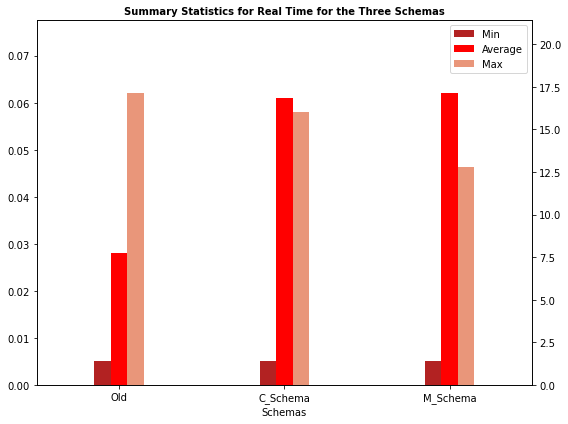

In [611]:
fig,ax = plt.subplots(figsize=(8,6))

labels = summary_real.index.tolist()

x = np.arange(len(labels))

ax2 = ax.twinx()

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0, summary_real["average_"].max()*1.25)
ax2.set_ylim(0, summary_real["max_"].max()*1.25)

ax.set_xlabel('Schemas')

color=['firebrick','red','darksalmon']
width = 0.1
p1 = ax.bar(x-(width), summary_real['min_'], width=width, color=color[0], align='center', label=r'Min')
p2 = ax.bar(x, summary_real['average_'], width=width, color=color[1], align='center', label=r'Average')
p3 = ax2.bar(x+width, summary_real['max_'], width=width, color=color[2], align='center', label=r'Max')

lns = [p1,p2,p3]
ax.legend(handles=lns, loc='best')

ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_title("Summary Statistics for Real Time for the Three Schemas",fontsize=10, weight='bold')
fig.show()

In [612]:
#summary data for user running-time
summary_user = pd.DataFrame(
   {
      "average_": [],
      "max_": [],
      "min_": []
   }
)

for i, j in enumerate([old_stats_user, c_stats_user, m_stats_user]):
   summary_user.loc[i] = j
summary_user = summary_user.rename(index={0: "Old", 1: "C_Schema", 2: "M_Schema"})

In [613]:
#view of the user running-time dataframe
summary_user

,average_,max_,min_
Old,0.004,0.024,0.0
C_Schema,0.004,0.025,0.0
M_Schema,0.004,0.026,0.0


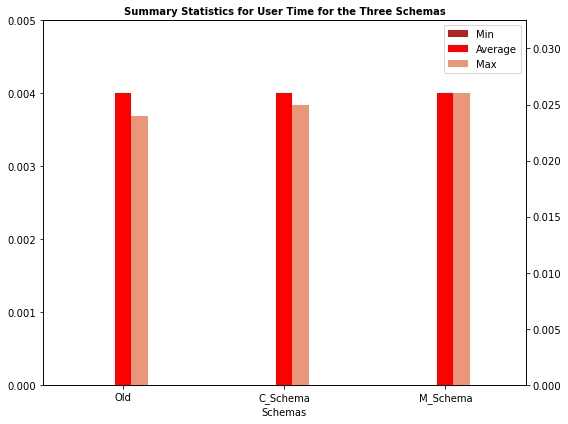

In [614]:
fig,ax = plt.subplots(figsize=(8,6))

labels = summary_user.index.tolist()

x = np.arange(len(labels))

ax2 = ax.twinx()

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0, summary_user["average_"].max()*1.25)
ax2.set_ylim(0, summary_user["max_"].max()*1.25)

ax.set_xlabel('Schemas')

color=['firebrick','red','darksalmon']
width = 0.1
p1 = ax.bar(x-(width), summary_user['min_'], width=width, color=color[0], align='center', label=r'Min')
p2 = ax.bar(x, summary_user['average_'], width=width, color=color[1], align='center', label=r'Average')
p3 = ax2.bar(x+width, summary_user['max_'], width=width, color=color[2], align='center', label=r'Max')

lns = [p1,p2,p3]
ax.legend(handles=lns, loc='best')

ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_title("Summary Statistics for User Time for the Three Schemas", fontsize=10, weight='bold')
fig.show()

The results for real time show us that the old system on an average performed better compared to the new schemas but for certain queries it ran longer and had the worst max run time for a query (almost similar to the C schema run-time). M schema had the best max run-time, implying that it never took too long. This shows that C schema overall does not outperform the old schema or M schema in any factor of measure.

The results for the user time do not show too much difference; the plot only indicates that the old schema worked well with the user time as well.

The analyses conducted has only considered factors individually for the running-time for the three schemas. The results show that on an average the old schema had the best real running-time. The M schema had the best worst running-time compared to the other schemas. The user running-time does not fluctuate significantly for the three schemas. However, it would be important to evaluate and compare if there could be potentially significant differences in the real running-time when we compare across different axes.

In [615]:
#We check the different range of values for the given axes
geo_range = old_schema['geo'].unique()
signal_range = old_schema['signal'].unique()
time_range = old_schema['time'].unique()
publication_range = old_schema['publication'].unique()
print(geo_range, signal_range, time_range, publication_range)

['1' '2' '50' '5' 'STAR' '200'] ['1'] ['120' '1' '3' '48' '54' '59' '10' '112' '119' '11' '126' '12' '13' '149'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27'
 '28' '29' '2' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '49' '4' '50' '51' '52' '53' '55' '56' '57'
 '58' '5' '60' '61' '62' '63' '64' '65' '66' '68' '6' '70' '79' '7' '84'
 '8' '91' '98' '9' '1953' '196'] ['1' 'RANGE']


In [616]:
#Creates a dataframe with only the geo axis and the real time for the three schemas
real_geo = pd.concat([old_schema['geo'], old_schema['real'], c_schema['real'], m_schema['real']], axis=1, keys=['geo', 'Old', 'C', 'M'])

In [617]:
#code to get the mean for geo 1 for each schema
real_geo.loc[real_geo['geo']=='1'].mean()

geo         inf
Old    0.079955
C      0.070294
M      0.064459
dtype: float64

Text(0, 0.5, 'Real Running-Time')

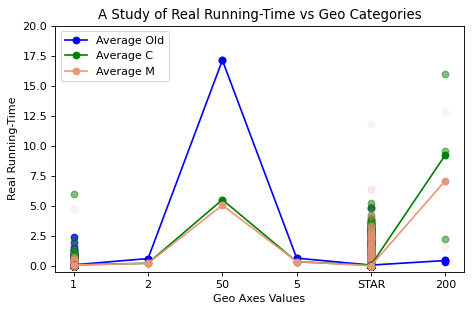

In [618]:
figure(figsize=(6, 4), dpi=80)
plt.scatter(real_geo["geo"], real_geo["Old"], alpha=0.8, color='b')
plt.scatter(real_geo["geo"], real_geo["C"], alpha=0.5, color = 'g')
plt.scatter(real_geo["geo"], real_geo["M"], alpha=0.1, color = 'darksalmon')
plt.ylim(-0.5, 20)

#line for old
x=real_geo['geo'].unique()
y1=[real_geo.loc[real_geo['geo']=='1'].mean()[1], real_geo.loc[real_geo['geo']=='2'].mean()[1], real_geo.loc[real_geo['geo']=='50'].mean()[1], real_geo.loc[real_geo['geo']=='5'].mean()[1], real_geo.loc[real_geo['geo']=='STAR'].mean()[1], real_geo.loc[real_geo['geo']=='200'].mean()[1]]
plt.plot(x, y1, '-o', color='b', label="Average Old")

#line for C
y2=[real_geo.loc[real_geo['geo']=='1'].mean()[2], real_geo.loc[real_geo['geo']=='2'].mean()[2], real_geo.loc[real_geo['geo']=='50'].mean()[2], real_geo.loc[real_geo['geo']=='5'].mean()[2], real_geo.loc[real_geo['geo']=='STAR'].mean()[2], real_geo.loc[real_geo['geo']=='200'].mean()[2]]
plt.plot(x, y2, '-o', color='g', label="Average C")

#line for M
y3=[real_geo.loc[real_geo['geo']=='1'].mean()[3], real_geo.loc[real_geo['geo']=='2'].mean()[3], real_geo.loc[real_geo['geo']=='50'].mean()[3], real_geo.loc[real_geo['geo']=='5'].mean()[3], 0, real_geo.loc[real_geo['geo']=='200'].mean()[3]]
plt.plot(x, y3, '-o', color='darksalmon', label="Average M")
plt.legend(loc='best')

plt.title("A Study of Real Running-Time vs Geo Categories")
plt.xlabel("Geo Axes Values")
plt.ylabel("Real Running-Time")

In [619]:
#Creates a dataframe with only the time axis and the real time for the three schemas
real_time = pd.concat([old_schema['time'], old_schema['real'], c_schema['real'], m_schema['real']], axis=1, keys=['time', 'Old', 'C', 'M'])

Text(0, 0.5, 'Real Running-Time')

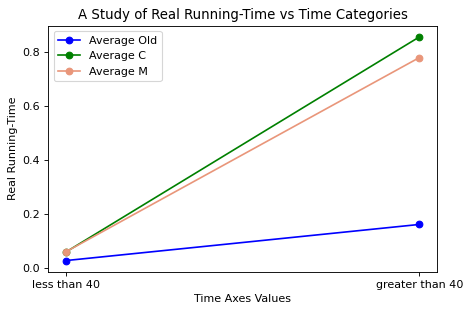

In [620]:
figure(figsize=(6, 4), dpi=80)

#line for old
x=["less than " + str(statistics.median([int(x) for x in real_time['time'].unique()])), "greater than " + str(statistics.median([int(x) for x in real_time['time'].unique()]))]
y1=[real_time.loc[real_time['time']<=str(statistics.median([int(x) for x in real_time['time'].unique()]))].mean()[1], real_time.loc[real_time['time']>str(statistics.median([int(x) for x in real_time['time'].unique()]))].mean()[1]]
plt.plot(x, y1, '-o', color='b', label="Average Old")

#line for C
y2=[real_time.loc[real_time['time']<=str(statistics.median([int(x) for x in real_time['time'].unique()]))].mean()[2], real_time.loc[real_time['time']>str(statistics.median([int(x) for x in real_time['time'].unique()]))].mean()[2]]
plt.plot(x, y2, '-o', color='g', label="Average C")

#line for M
y3=[real_time.loc[real_time['time']<=str(statistics.median([int(x) for x in real_time['time'].unique()]))].mean()[3], real_time.loc[real_time['time']>str(statistics.median([int(x) for x in real_time['time'].unique()]))].mean()[3]]
plt.plot(x, y3, '-o', color='darksalmon', label="Average M")

plt.legend(loc='best')
plt.title("A Study of Real Running-Time vs Time Categories")
plt.xlabel("Time Axes Values")
plt.ylabel("Real Running-Time")

In [621]:
#Creates a dataframe with only the publication axis and the real time for the three schemas
real_publication = pd.concat([old_schema['publication'], old_schema['real'], c_schema['real'], m_schema['real']], axis=1, keys=['publication', 'Old', 'C', 'M'])

Text(0, 0.5, 'Real Running-Time')

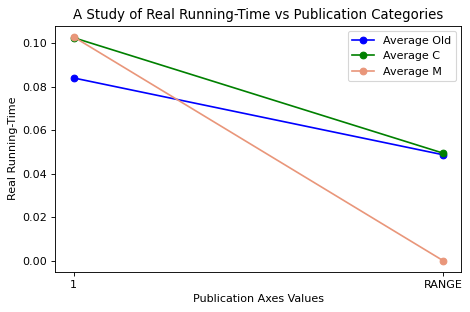

In [622]:
#Plot for publication
figure(figsize=(6, 4), dpi=80)

#line for old
x=real_publication['publication'].unique()
y1=[real_publication.loc[real_publication['publication']==real_publication['publication'].unique()[0]].mean()[1], real_publication.loc[real_publication['publication']==real_publication['publication'].unique()[1]].mean()[1]]
plt.plot(x, y1, '-o', color='b', label="Average Old")

#line for C
y2=[real_publication.loc[real_publication['publication']==real_publication['publication'].unique()[0]].mean()[2], real_publication.loc[real_publication['publication']==real_publication['publication'].unique()[1]].mean()[2]]
plt.plot(x, y2, '-o', color='g', label="Average C")

#line for M
y3=[real_publication.loc[real_publication['publication']==real_publication['publication'].unique()[0]].mean()[3], 0]
plt.plot(x, y3, '-o', color='darksalmon', label="Average M")

plt.legend(loc='best')
plt.title("A Study of Real Running-Time vs Publication Categories")
plt.xlabel("Publication Axes Values")
plt.ylabel("Real Running-Time")

We had restricted our analyses to real running time. The last few plots helped us understand how the three schemas differed in their mean running time for the different values that were used for the four different axes. We did not consider the signal axis for analysis as the signal axis only had one value of 1. Therefore, the analyses was conducted on the remaining three axes. We discovered that the schema M had the best running time for all geo values except 200. This is contrary to what we had discovered that the old schema was generally the best. For the queries that had data collected for time value less than 40, we discovered that the old schema performed the best in terms of the running time. Finally, the publication axis showed mixed results, where M was the best for a range of publication values and the old schema was the best performer for the publication axis values as 1 for the four different categories - lag, latest, asof, and issue.

The analyses considered only the real time as the user time produced similar results for the three schemas and the kernel time was highly negatively correlated with user time. This directioned the analyses towards real running time, which was further brought down to multiple axes values.

The conducted analyses overall shows that the old schema outperformed the two new schemas in terms of real running-time. The advantage of the M schema was its worst case running time being 33% less than the worst case running time for both the old schema and C schema. C schema did not really show any advantages over the other two and the further detailed analyses on the basis of the axes solidifies the argument. The M schema performs better than the old schema for geo and publication as opposed to the old schema that outperforms the other two schema for time axis.